![example](images/director_shot.jpeg)

   # Recent Movie Profitablility Analysis

**Author:** Spencer Hadel
***

## Overview

This analysis will use data from TheMovieDB, IMDB, and

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

budgets: for release date, production budget, and domestic/worldwide gross

titles: movie names and genres

names: for actors, directors, etc (connect to title_basics via known_for_titles(?))

reviews: ratings, also connected through tconst

In [103]:
xxx = pd.read_csv('http://files.tmdb.org/p/exports/movie_ids_04_28_2017.json.gz', sep='\t')
xxx

HTTPError: HTTP Error 403: Forbidden

In [2]:
budgets_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


use release_date to make new columns MONTH and YEAR

In [3]:
budgets_df['month'] = budgets_df.release_date.str[:3]
budgets_df['year'] = budgets_df.release_date.str[-4:]
budgets_df.drop(['id','worldwide_gross', 'release_date'], axis=1, inplace=True)

months_to_nums = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 
                  'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
budgets_df['monthNum'] = budgets_df['month'].apply(lambda x: months_to_nums.get(x))

In [102]:
budgets_df['year'][budgets_df['year']>=2018].value_counts()

2018    143
2019     67
2020      3
Name: year, dtype: int64

In [5]:
budgets_df.rename(columns={'production_budget': 'budget', 'domestic_gross': 'gross'}, inplace=True)

Change budget, domestic gross, and year to INTs

In [6]:
budgets_df['budget'].replace('[\$,]', '', regex=True, inplace=True)
budgets_df['gross'].replace('[\$,]', '', regex=True, inplace=True)

budgets_df['year'] = pd.to_numeric(budgets_df['year'])
budgets_df['budget'] = pd.to_numeric(budgets_df['budget'])
budgets_df['gross'] = pd.to_numeric(budgets_df['gross'])

In [7]:
budgets_df.dtypes

movie       object
budget       int64
gross        int64
month       object
year         int64
monthNum     int64
dtype: object

Add a profit column using budget and gross

In [8]:
budgets_df['profit'] = budgets_df["gross"] - budgets_df["budget"]

read in titles dataframe

In [75]:
titles_df = pd.read_csv('data/zippedData/title.basics.tsv.gz', sep='\t')
titles_df.head()

C:\Users\moola\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


we will pull only data starting in 2018! ______ etc

In [85]:
df = titles_df[titles_df['titleType'] == 'movie']

df = df[df['startYear'].isin(['2018', '2019', '2020', '2021'])]

df.sort_values('startYear', ascending=False)

2018    18186
2019    17678
2021    17004
2020    15167
Name: startYear, dtype: int64

remove start_year and runtime, as well as worldwide gross (we are looking at DOMESTIC numbers for this analysis)


In [10]:
combined_df = pd.merge(titles_df, budgets_df, left_on='primary_title', right_on='movie', how = 'inner')
combined_df.drop(['primary_title'], axis=1, inplace = True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3815 non-null   object 
 1   original_title   3814 non-null   object 
 2   start_year       3815 non-null   int64  
 3   runtime_minutes  3328 non-null   float64
 4   genres           3743 non-null   object 
 5   movie            3815 non-null   object 
 6   budget           3815 non-null   int64  
 7   gross            3815 non-null   int64  
 8   month            3815 non-null   object 
 9   year             3815 non-null   int64  
 10  monthNum         3815 non-null   int64  
 11  profit           3815 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 387.5+ KB


Drop rows with incomplete info, or where movie is a duplicate.

Also dropping rows with $0 listed as domestic gross income, because this is clearly incomplete data that could drastically skew results.

In [11]:
combined_df.dropna(inplace=True)
combined_df.drop_duplicates('movie')
combined_df= combined_df[combined_df['gross'] != 0]
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2853 entries, 3 to 3813
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2853 non-null   object 
 1   original_title   2853 non-null   object 
 2   start_year       2853 non-null   int64  
 3   runtime_minutes  2853 non-null   float64
 4   genres           2853 non-null   object 
 5   movie            2853 non-null   object 
 6   budget           2853 non-null   int64  
 7   gross            2853 non-null   int64  
 8   month            2853 non-null   object 
 9   year             2853 non-null   int64  
 10  monthNum         2853 non-null   int64  
 11  profit           2853 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 289.8+ KB


Finally we will sort the columns for better readability

In [12]:
combined_df = combined_df[['tconst', 'movie', 'genres', 'budget', 'gross', 'profit', 'month', 'year', 'monthNum']]

Let's only look at the last 4 years of movies. First we look at the dataframe starting with the most recent movie for better understanding.

In [13]:
combined_df.sort_values('year').tail()

,tconst,movie,genres,budget,gross,profit,month,year,monthNum
2899,tt6857112,Us,"Horror,Mystery,Thriller",20000000,175006930,155006930,Mar,2019,3
2898,tt4862056,Us,Comedy,20000000,175006930,155006930,Mar,2019,3
2897,tt2708782,Us,Drama,20000000,175006930,155006930,Mar,2019,3
2391,tt2139881,Long Shot,"Comedy,Romance",40000000,30202860,-9797140,May,2019,5
3701,tt6811018,The Kid Who Would Be King,"Action,Adventure,Family",59000000,16790790,-42209210,Jan,2019,1


So the data will be taken from the years 2016-2019. But first we double check that 2019's data is complete:


In [14]:
combined_df[combined_df['year']==2019]['month'].value_counts()

May    9
Jan    9
Mar    9
Feb    8
Apr    4
Jun    4
Name: month, dtype: int64

It is not, so we use years 2015-2018

In [15]:
recent_df = combined_df[(combined_df['year'] >= 2015) & (combined_df['year'] <= 2018)].sort_values('monthNum')

The following shows chart shows the average budgets and gross income for movies between 2015-2018, sorted by month.

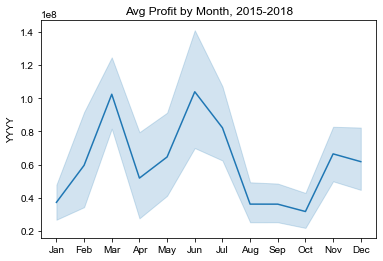

In [16]:
ax = sns.lineplot(x="month", y = "gross", data = recent_df)

ax.set_xlabel("")
ax.set_ylabel("YYYY")
ax.set_title("Avg Profit by Month, 2015-2018")

sns.set_style("darkgrid", {"grid.linestyle":":"})
sns.set(rc={'figure.figsize':(15,5)})

A graph of profits by month indicates that the months with highest success rates tend to be early spring, early summer, and to a lesser degree, the holiday season. 

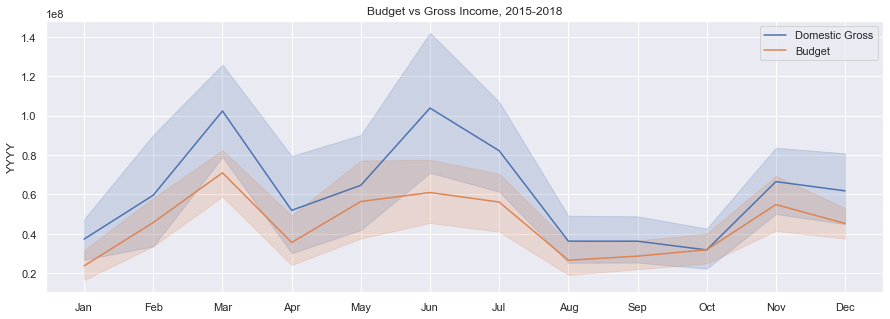

In [17]:

ax = sns.lineplot(x="month", y = "gross", data = recent_df)
ax1 = sns.lineplot(x="month", y = "budget", data = recent_df)


ax.set_xlabel("")
ax.set_ylabel("YYYY")
ax.set_title("Budget vs Gross Income, 2015-2018")
ax.legend(labels=["Domestic Gross","Budget"])

sns.set_style("darkgrid", {"grid.linestyle":":"})
sns.set(rc={'figure.figsize':(15,5)})

This graph further verifies that increased budgets behind a movie's production seem to directly effect its domestic gross income.

Next we break down these findings by Genre of movie, to see whcih of the most popular Genres tend to be more successful in general, and during which times of year.

In [18]:
recent_df['genres'].value_counts()

Drama                         71
Documentary                   47
Adventure,Animation,Comedy    32
Comedy                        30
Action,Adventure,Sci-Fi       23
                              ..
Drama,Horror                   1
Horror,Romance,Thriller        1
Adventure,Animation,Family     1
Horror,Music,Thriller          1
Biography,Drama,Musical        1
Name: genres, Length: 187, dtype: int64

We need to break down each film by genre. If a film is listed as a Comedy and Drama ,for example, it will become two separate entries, as each genre separately.

In [19]:
#remove genre commas, and separate individual words into lists

recent_df['genres'] = recent_df['genres'].str.split(',')

In [20]:
recent_df.head()

,tconst,movie,genres,budget,gross,profit,month,year,monthNum
1948,tt4393036,Emily,[Drama],27000,3547,-23453,Jan,2017,1
2557,tt4276820,The Founder,"[Biography, Drama, History]",15000000,12786053,-2213947,Jan,2017,1
2556,tt2262282,The Founder,"[Comedy, Sci-Fi]",15000000,12786053,-2213947,Jan,2017,1
2505,tt2231253,Wild Card,"[Action, Crime, Drama]",30000000,3200,-29996800,Jan,2015,1
2445,tt2182972,Song One,"[Drama, Music]",6000000,32251,-5967749,Jan,2015,1


In [21]:
#separate lists of genres into new row entries

genre_df = recent_df.explode('genres')

genre_df['genres'].value_counts()

Drama          426
Comedy         225
Action         203
Adventure      167
Thriller       125
Crime          101
Horror         100
Biography      100
Documentary     77
Romance         74
Mystery         64
Sci-Fi          61
Fantasy         58
Animation       50
History         40
Family          39
Music           26
Sport           23
War             10
Musical          7
Western          2
News             1
Name: genres, dtype: int64

In [22]:
#remove lowest values, as they will skew data (everything below 50)

value_counts = genre_df['genres'].value_counts()
genre_df = genre_df[~genre_df['genres'].isin(value_counts[value_counts <= 50].index)]

In [23]:
profit_by_genre = genre_df.groupby('genres').mean()
profit_by_genre.reset_index(level=0, inplace=True)
profit_by_genre.drop('year', axis=1, inplace=True)

profit_by_genre.head()

,genres,budget,gross,profit,monthNum
0,Action,8.109729e+07,9.162062e+07,1.052333e+07,6.334975
1,Adventure,1.002797e+08,1.228922e+08,2.261242e+07,6.754491
2,Biography,2.948000e+07,3.947402e+07,9.994019e+06,7.970000
3,Comedy,4.114489e+07,6.598311e+07,2.483822e+07,6.684444
4,Crime,3.574768e+07,3.981691e+07,4.069229e+06,7.148515


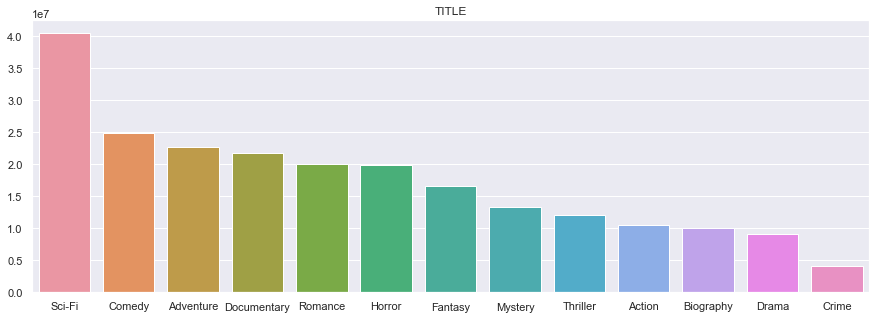

In [24]:
ax = sns.barplot(x='genres', y = "profit", data = profit_by_genre, 
                 order=profit_by_genre.sort_values('profit', ascending=False).genres)

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("TITLE")

sns.set_style("darkgrid", {"grid.linestyle":":"})
sns.set(rc={'figure.figsize':(20,5)})

Animation and Sci-Fi genres easily beat out the competition in terms of average profits, but it's worth looking at the most popular genres on a month-to-month basis. We'll look at the top 4.

In [25]:
animation_df = genre_df[genre_df['genres']=='Animation'].groupby('month').mean().sort_values('monthNum')
scifi_df = genre_df[genre_df['genres']=='Sci-Fi'].groupby('month').mean().sort_values('monthNum')
comedy_df = genre_df[genre_df['genres']=='Comedy'].groupby('month').mean().sort_values('monthNum')
adventure_df = genre_df[genre_df['genres']=='Adventure'].groupby('month').mean().sort_values('monthNum')

animation_df.reset_index(level=0, inplace=True)
scifi_df.reset_index(level=0, inplace=True)
comedy_df.reset_index(level=0, inplace=True)
adventure_df.reset_index(level=0, inplace=True)

In [26]:
scifi_df.head()

,month,budget,gross,profit,year,monthNum
0,Jan,2.233333e+07,2.065966e+07,-1.673671e+06,2016.333333,1.0
1,Feb,9.950000e+07,1.964146e+08,9.691458e+07,2015.750000,2.0
2,Mar,1.030000e+08,8.286669e+07,-2.013331e+07,2017.142857,3.0
3,Apr,6.717857e+07,1.467128e+08,7.953427e+07,2017.000000,4.0
4,May,1.444429e+08,1.786342e+08,3.419131e+07,2016.000000,5.0


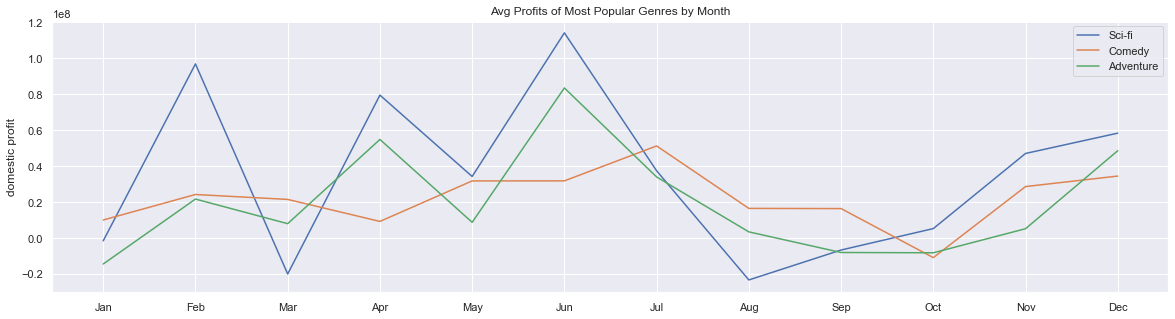

In [27]:
ax = sns.lineplot(x="month", y = "profit", data = scifi_df)
ax1 = sns.lineplot(x="month", y = "profit", data = comedy_df)
ax2 = sns.lineplot(x="month", y = "profit", data = adventure_df)
ax3 = sns.lineplot(x="month", y = "profit", data = animation_df)

ax.set_xlabel("")
ax.set_ylabel("domestic profit")
ax.set_title("Avg Profits of Most Popular Genres by Month")
ax.legend(labels=['Sci-fi', 'Comedy', 'Adventure', 'Animation'])

sns.set_style("darkgrid", {"grid.linestyle":":"})
sns.set(rc={'figure.figsize':(15,5)})

This indicates that Animated films are most profitable in the summer. However, in February, when most movies are not very profitable, Sci-fi films stand a chance of success.

It would generally appear that movie budget correlates directly to movie profitability, but now that we have broken down the data by genre and month, we can take a closer look at exactly what budgets for each genre can yield success in a given month.

[Text(0.5, 1.0, 'Animation'), Text(0.5, 0, ''), Text(0, 0.5, '$')]

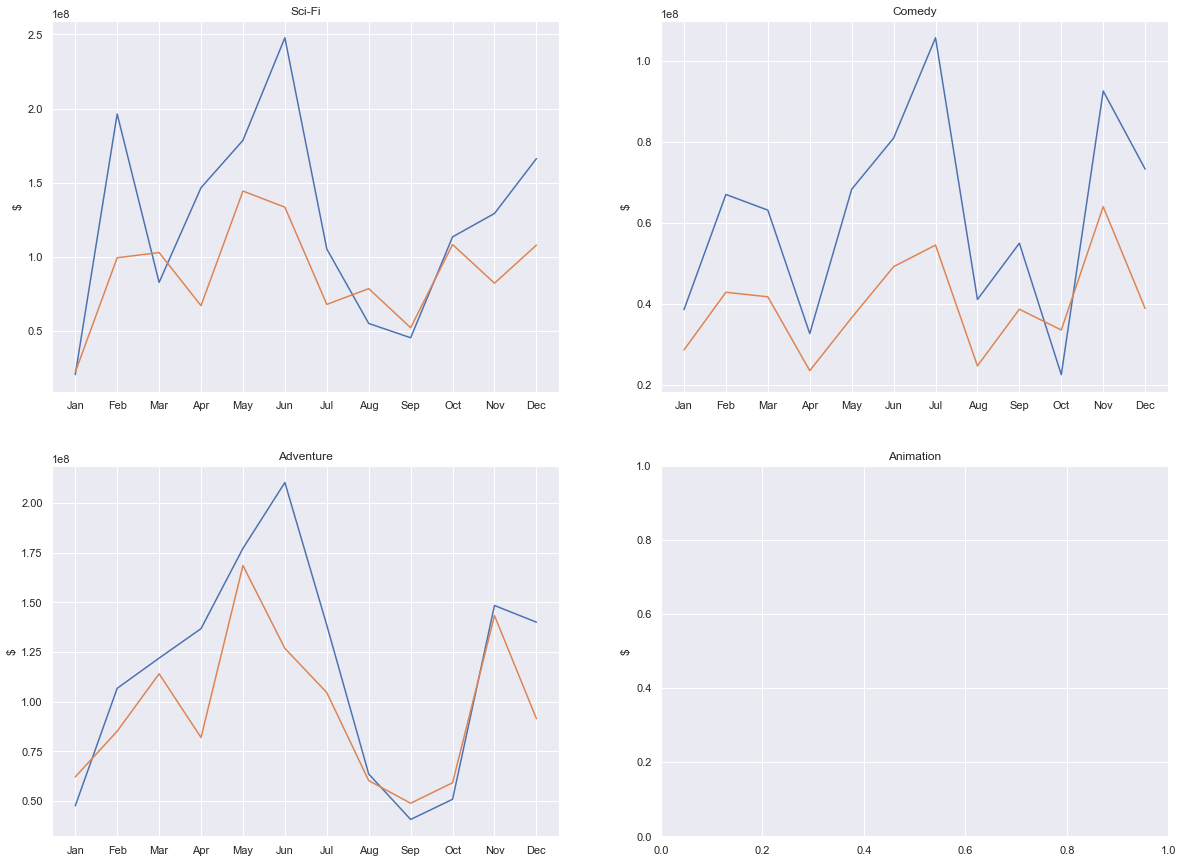

In [28]:
fig, axes =plt.subplots(nrows=2,ncols=2, figsize =(20,15))


sns.lineplot(data=scifi_df, x="month", y="gross", ax=axes[0][0])
sns.lineplot(data=scifi_df, x="month", y="budget", ax=axes[0][0]).set(title='Sci-Fi', xlabel="", ylabel= "$")

sns.lineplot(data=comedy_df, x="month", y="gross", ax=axes[0][1])
sns.lineplot(data=comedy_df, x="month", y="budget", ax=axes[0][1]).set(title='Comedy', xlabel="", ylabel= "$")

sns.lineplot(data=adventure_df, x="month", y="gross", ax=axes[1][0])
sns.lineplot(data=adventure_df, x="month", y="budget", ax=axes[1][0]).set(title='Adventure', xlabel="", ylabel= "$")

sns.lineplot(data=animation_df, x="month", y="gross", ax=axes[1][1])
sns.lineplot(data=animation_df, x="month", y="budget", ax=axes[1][1]).set(title='Animation', xlabel="", ylabel= "$")

In [29]:
reviews_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
budgets_df.head()

,movie,budget,gross,month,year,monthNum,profit
0,Avatar,425000000,760507625,Dec,2009,12,335507625
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,May,2011,5,-169536125
2,Dark Phoenix,350000000,42762350,Jun,2019,6,-307237650
3,Avengers: Age of Ultron,330600000,459005868,May,2015,5,128405868
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,Dec,2017,12,303181382


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [30]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [31]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***